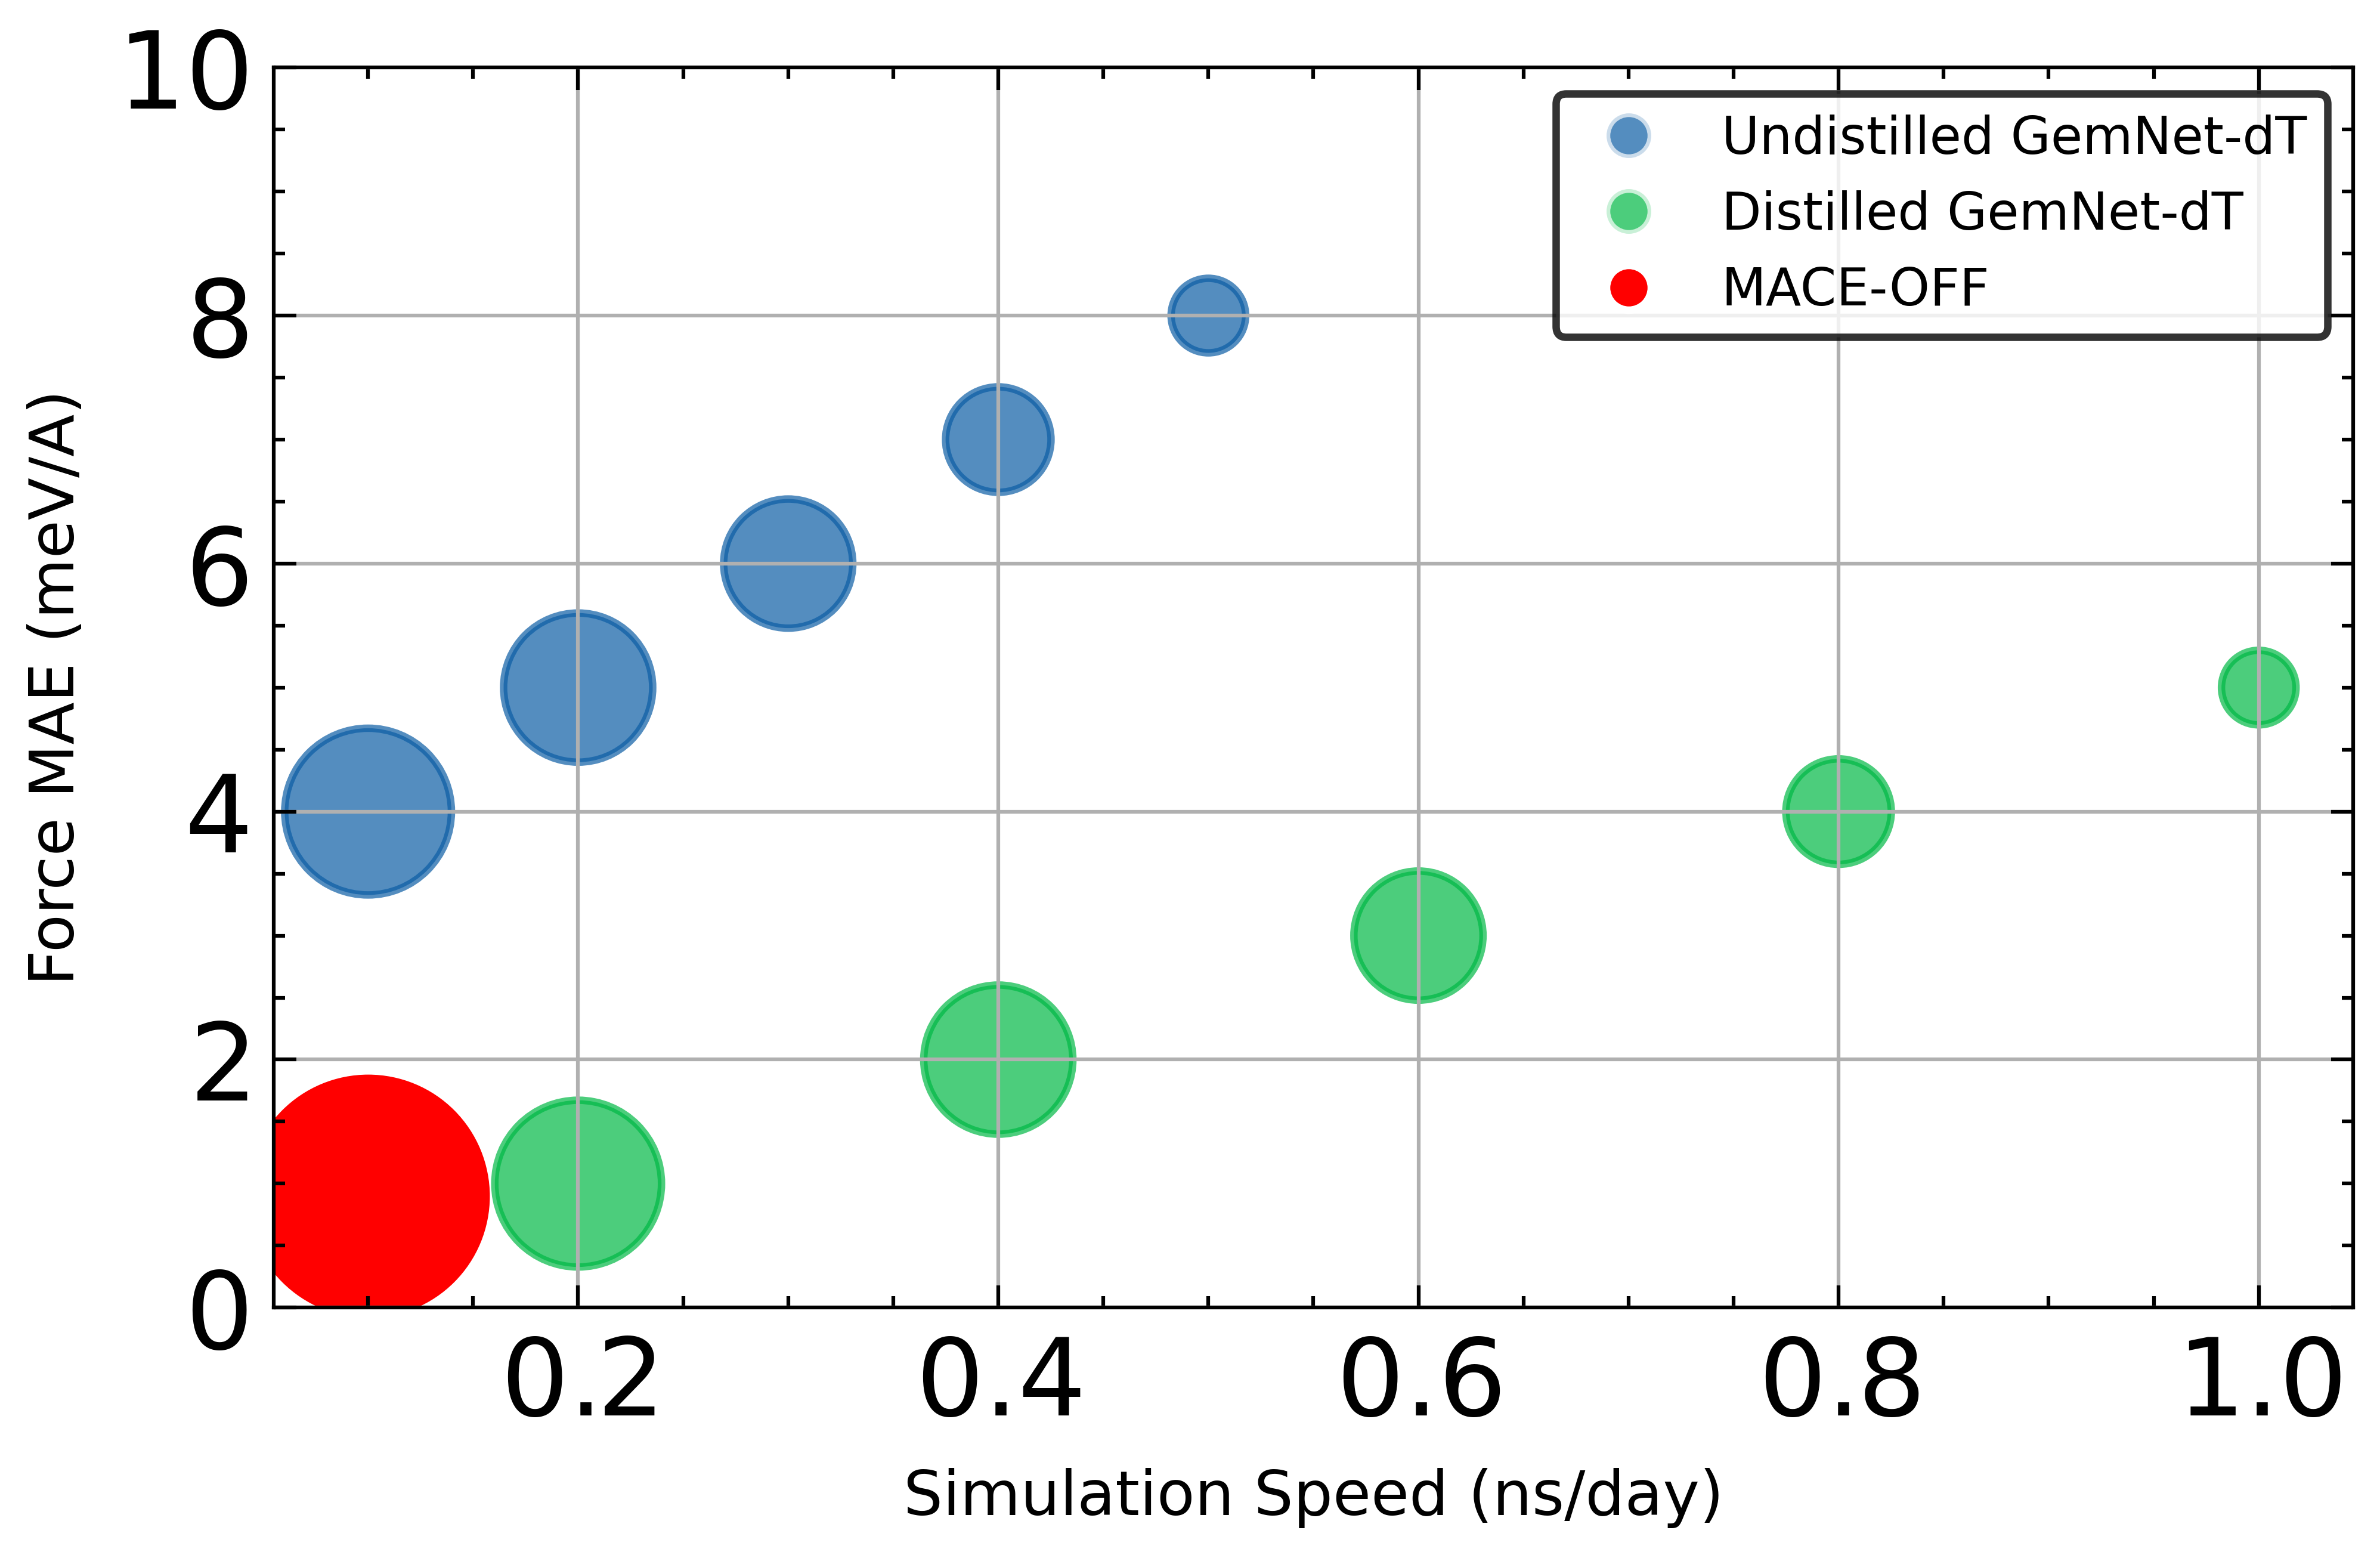

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import scienceplots
import os
import glob
import os
import torch
import numpy as np
import json
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from math import floor, log10
from tensorboard.backend.event_processing import event_accumulator
import warnings
warnings.filterwarnings("ignore")
plt.style.use(['science','no-latex'])
import matplotlib.pylab as pylab
params = {'figure.dpi': 900,
            'axes.labelsize': 'small',
          'legend.fontsize': 'x-small',
         'axes.titlesize':'medium',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.family': 'DejaVu Sans'}
from matplotlib import rc
pylab.rcParams.update(params)


teacher_speed = 0.1
undist_student_speeds = [0.1, 0.2, 0.3, 0.4, 0.5]
dist_student_speeds = [0.2, 0.4, 0.6, 0.8, 1.0]


teacher_error = 0.9
undist_student_errors = [4,5,6, 7, 8]
dist_student_errors = [1,2,3,4,5]

student_sizes = [500, 400, 300, 200, 100]
teacher_size = 1000

# Create the plot with varying marker sizes in the plot but fixed sizes in the legend
plt.figure(figsize=(5, 3))

# Plot undistilled student with varying marker sizes
plt.scatter(undist_student_speeds, undist_student_errors, 
            label='Undistilled GemNet-dT', 
            marker='o', 
            s=student_sizes,  # Marker size proportional to student size
            alpha=0.7)

# Plot distilled student with varying marker sizes
plt.scatter(dist_student_speeds, dist_student_errors, 
            label='Distilled GemNet-dT', 
            marker='o', 
            s=student_sizes,  # Marker size proportional to student size
            alpha=0.7)

# Plot teacher
plt.scatter(teacher_speed, teacher_error, 
            label='MACE-OFF', 
            marker='o', 
            color='red', 
            s=teacher_size)  # Marker size proportional to teacher size

# Create a custom legend with fixed marker sizes
handles, labels = plt.gca().get_legend_handles_labels()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=h.get_facecolor()[0], 
                             markersize=6, label=l) for h, l in zip(handles, labels)]

plt.legend(legend_handles, labels, frameon=True, edgecolor='black')  # Add a box around the legend

# Add grid to the background
plt.grid(True)
plt.xlabel('Simulation Speed (ns/day)')
plt.ylabel('Force MAE (meV/A)')
plt.ylim(0, 10)


plt.savefig('speed_vs_error.png')
plt.show()
plt.close()


